## Predict Round of 16 World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(601, 19)
(8, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-03,Netherlands,United States,83,77,83,78,83,76,8,16,1694.51,1627.48,FIFA World Cup,Al Rayyan,Qatar,True
1,2022-12-03,Argentina,Australia,85,72,83,72,83,71,3,38,1773.88,1488.72,FIFA World Cup,Al Rayyan,Qatar,True
2,2022-12-04,France,Poland,86,80,84,76,83,76,4,26,1759.78,1548.59,FIFA World Cup,Doha,Qatar,True
3,2022-12-04,England,Senegal,86,79,83,77,83,77,5,18,1728.47,1584.38,FIFA World Cup,Al Khor,Qatar,True
4,2022-12-05,Japan,Croatia,75,83,78,82,76,78,24,12,1559.54,1645.64,FIFA World Cup,Al Wakrah,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = df_internationalmatches.iloc[:,3:].astype(float)

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float)

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    # The model is still a secret until all World Cup matches are finished
    
    
    
    
    
    
])

In [12]:
model.compile(# Still secret
              
              
              )

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
61/61 [==============================] - 1s 1ms/step - loss: 29.5409 - accuracy: 0.4126
Epoch 2/500
61/61 [==============================] - 0s 2ms/step - loss: 6.3214 - accuracy: 0.4243
Epoch 3/500
61/61 [==============================] - 0s 2ms/step - loss: 7.7795 - accuracy: 0.3977
Epoch 4/500
61/61 [==============================] - 0s 1ms/step - loss: 7.2610 - accuracy: 0.4210
Epoch 5/500
61/61 [==============================] - 0s 1ms/step - loss: 7.3564 - accuracy: 0.4093
Epoch 6/500
61/61 [==============================] - 0s 1ms/step - loss: 8.3077 - accuracy: 0.3943
Epoch 7/500
61/61 [==============================] - 0s 1ms/step - loss: 7.1374 - accuracy: 0.4143
Epoch 8/500
61/61 [==============================] - 0s 1ms/step - loss: 5.5461 - accuracy: 0.4043
Epoch 9/500
61/61 [==============================] - 0s 1ms/step - loss: 6.8133 - accuracy: 0.3960
Epoch 10/500
61/61 [==============================] - 0s 1ms/step - loss: 4.7018 - accuracy: 0.4609
Epoch 11

61/61 [==============================] - 0s 2ms/step - loss: 2.4450 - accuracy: 0.4676
Epoch 84/500
61/61 [==============================] - 0s 2ms/step - loss: 2.5363 - accuracy: 0.4443
Epoch 85/500
61/61 [==============================] - 0s 2ms/step - loss: 2.4651 - accuracy: 0.4592
Epoch 86/500
61/61 [==============================] - 0s 1ms/step - loss: 2.4092 - accuracy: 0.4493
Epoch 87/500
61/61 [==============================] - 0s 1ms/step - loss: 2.3820 - accuracy: 0.4709
Epoch 88/500
61/61 [==============================] - 0s 2ms/step - loss: 2.3821 - accuracy: 0.4792
Epoch 89/500
61/61 [==============================] - 0s 1ms/step - loss: 2.4240 - accuracy: 0.4493
Epoch 90/500
61/61 [==============================] - 0s 1ms/step - loss: 2.3415 - accuracy: 0.4725
Epoch 91/500
61/61 [==============================] - 0s 2ms/step - loss: 2.3104 - accuracy: 0.5008
Epoch 92/500
61/61 [==============================] - 0s 1ms/step - loss: 2.2868 - accuracy: 0.5158
Epoch 93/500


61/61 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.5141
Epoch 244/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0708 - accuracy: 0.5058
Epoch 245/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0564 - accuracy: 0.5191
Epoch 246/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0530 - accuracy: 0.5191
Epoch 247/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0459 - accuracy: 0.5108
Epoch 248/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0487 - accuracy: 0.5158
Epoch 249/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0413 - accuracy: 0.5258
Epoch 250/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0456 - accuracy: 0.5141
Epoch 251/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0430 - accuracy: 0.5175
Epoch 252/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0400 - accuracy: 0.5158
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 1.0152 - accuracy: 0.5175
Epoch 404/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0117 - accuracy: 0.5258
Epoch 405/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.5308
Epoch 406/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0029 - accuracy: 0.5225
Epoch 407/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0026 - accuracy: 0.5275
Epoch 408/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0032 - accuracy: 0.5308
Epoch 409/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.5241
Epoch 410/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0052 - accuracy: 0.5391
Epoch 411/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0058 - accuracy: 0.5175
Epoch 412/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.5291
Epoc

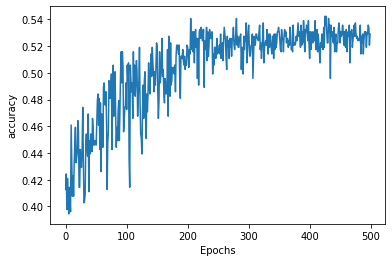

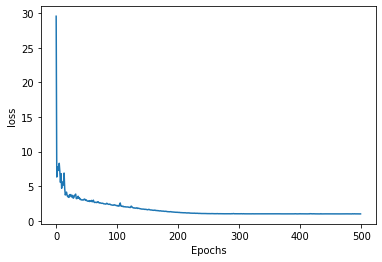

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Round of 16 World Cup 2022 Match in 90 Minutes')
print('=================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Round of 16 World Cup 2022 Match in 90 Minutes
Netherlands vs United States
Home Win: 0.49503  Draw: 0.28590  Away Win: 0.21907

Argentina vs Australia
Home Win: 0.73250  Draw: 0.19486  Away Win: 0.07264

France vs Poland
Home Win: 0.66926  Draw: 0.22414  Away Win: 0.10660

England vs Senegal
Home Win: 0.58926  Draw: 0.25673  Away Win: 0.15401

Japan vs Croatia
Home Win: 0.26740  Draw: 0.29175  Away Win: 0.44085

Brazil vs South Korea
Home Win: 0.74187  Draw: 0.19015  Away Win: 0.06799

Morocco vs Spain
Home Win: 0.24155  Draw: 0.28704  Away Win: 0.47142

Portugal vs Switzerland
Home Win: 0.46105  Draw: 0.29375  Away Win: 0.24520

